Input features shape: (5000, 5)
Output variable shape: (5000,)
Scaled features sample:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          1.028660            -0.296927                   0.021274   
1          1.000808             0.025902                  -0.255506   
2         -0.684629            -0.112303                   1.516243   
3         -0.491499             1.221572                  -1.393077   
4         -0.807073            -0.944834                   0.846742   

   Avg. Area Number of Bedrooms  Area Population  
0                      0.088062        -1.317599  
1                     -0.722301         0.403999  
2                      0.930840         0.072410  
3                     -0.584540        -0.186734  
4                      0.201513        -0.988387  

Fold 1
R2 Score: 0.9179971706985147

Fold 2
R2 Score: 0.9145677884802819

Fold 3
R2 Score: 0.9116116385364478

Fold 4
R2 Score: 0.9193091764960817

Fold 5
R2 Score: 0.924386941335

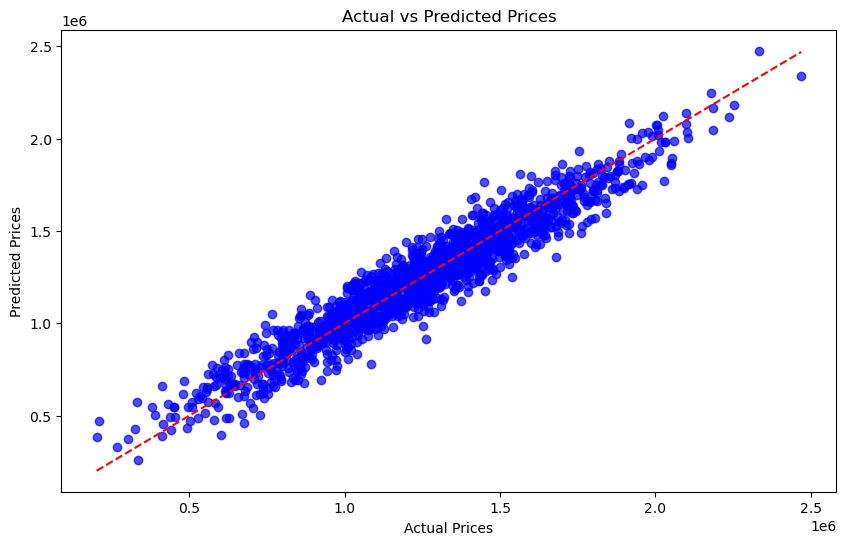

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

dataset = pd.read_csv('.//dataset/USA_Housing.csv')

X = dataset.drop('Price', axis=1)
y = dataset['Price']

print("Input features shape:", X.shape)
print("Output variable shape:", y.shape)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the input features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled features sample:")
print(X_scaled.head())

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Store R2 scores and beta coefficients for each fold
r2_scores = []
beta_coefficients = []

# Iterate through each fold
fold = 1
for train_index, test_index in kf.split(X_scaled):
    print(f"\nFold {fold}")

    # Split the data into training and testing sets
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert to numpy arrays
    X_train_np = X_train.values
    X_test_np = X_test.values
    y_train_np = y_train.values.reshape(-1, 1)
    y_test_np = y_test.values.reshape(-1, 1)

    # Add intercept term to X_train and X_test
    ones_train = np.ones((X_train_np.shape[0], 1))
    ones_test = np.ones((X_test_np.shape[0], 1))

    X_train_b = np.hstack([ones_train, X_train_np])
    X_test_b = np.hstack([ones_test, X_test_np])

    # Calculate beta coefficients using Normal Equation
    beta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_np)

    # Make predictions on the test set
    y_pred = X_test_b.dot(beta)

    # Calculate R2 score
    r2 = r2_score(y_test_np, y_pred)

    # Append results
    r2_scores.append(r2)
    beta_coefficients.append(beta)

    print(f"R2 Score: {r2}")

    fold += 1
# Find the index of the best R2 score
best_index = np.argmax(r2_scores)
best_beta = beta_coefficients[best_index]

print(f"\nBest R2 Score obtained in fold {best_index + 1}: {r2_scores[best_index]}")
print("Best Beta Coefficients:")
print(best_beta.flatten())

# Split the entire dataset into 70% training and 30% testing
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

# Convert to numpy arrays
X_train_full_np = X_train_full.values
X_test_full_np = X_test_full.values
y_train_full_np = y_train_full.values.reshape(-1, 1)
y_test_full_np = y_test_full.values.reshape(-1, 1)

# Add intercept term
ones_train_full = np.ones((X_train_full_np.shape[0], 1))
ones_test_full = np.ones((X_test_full_np.shape[0], 1))

X_train_full_b = np.hstack([ones_train_full, X_train_full_np])
X_test_full_b = np.hstack([ones_test_full, X_test_full_np])

# Make predictions on the test set using best beta
y_pred_full = X_test_full_b.dot(best_beta)

# Calculate R2 score
r2_full = r2_score(y_test_full_np, y_pred_full)

print(f"\nR2 Score on 30% test data using best beta: {r2_full}")

plt.figure(figsize=(10,6))
plt.scatter(y_test_full, y_pred_full, alpha=0.7, color='b')
plt.plot([y_test_full.min(), y_test_full.max()], [y_test_full.min(), y_test_full.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [19]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


In [20]:
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

In [21]:
test

array([2, 3])